# 1.この課題の目的
- 教師あり学習（分類問題）の概観を知る
- scikit-laernを使い分類を行えるようにする
- 手法の簡単な比較をする

## 以下の要件をすべて満たしていた場合、合格とします。
※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.アヤメの分類
Week3で使用したirisデータセットを使い、分類問題を解く練習をします。

irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。

- Iris setosa - Wikipedia
- Iris virgicolor - Wikipedia
- Iris virginica - Wikipedia

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。

## 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

# 3.分類問題の流れ
まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。

この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。

## 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を **2値分類** と呼び、それ以上の **多値分類** とは区別をします。それぞれで手法や評価方法が変わります。今回はまず**より基本的な2値分類**を行います。

# 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length
## 実際の問題では？

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [1]:
# pandas、numpy、matplotlib.pyplot をインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# irisデータの読み込み辞書型変数 dataに格納
from sklearn.datasets import load_iris
data = load_iris()

In [2]:
# 各ラベルの特徴量をデータフレームxに格納
x = pd.DataFrame(data['data'],columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 目的変数をデータフレームyに格納
y = pd.DataFrame(data['target'], columns=['Species'])

# uniqueメソッドにてデータフレーム y の中のユニークな値を確認し、各ラベルを確認する
y['Species'].unique()

array([0, 1, 2], dtype=int64)

In [4]:
# どのラベルが、どの花に対応しているのかを確認
# 0, 1, 2 →　'setosa', 'versicolor', 'virginica'
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# データフレーム　x と y を横に結合
# 特定のラベルの特徴量を抽出できるようにする為
x = pd.concat([x, y], axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### virgicolorとvirginicaそれぞれのsepal_lengthとpetal_lengthのみ抽出

In [6]:
# queryメソッドのにて ラベル　virgicolor と virginica の特徴量のみを抽出し
# さらにlocメソッドにてsepal_length 、petal_length列、Species列　のみ抽出
x_virgicolor_virginica = x.query('Species == 1 or Species == 2').loc[:,['sepal_length', 'petal_length', 'Species']]
x_virgicolor_virginica.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


# 【問題2-1】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

## 実際の問題では？

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

## 前処理
データに加工をしていきます。

### 散布図の表示

In [7]:
# virsicolor　の特徴量のみ抽出
feature_virsicolor = x_virgicolor_virginica.query('Species == 1')
feature_virsicolor.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [8]:
# virsinica　の特徴量のみ抽出
feature_virsinica = x_virgicolor_virginica.query('Species == 2')
feature_virsinica.head()

,sepal_length,petal_length,Species
100,6.3,6.0,2
101,5.8,5.1,2
102,7.1,5.9,2
103,6.3,5.6,2
104,6.5,5.8,2


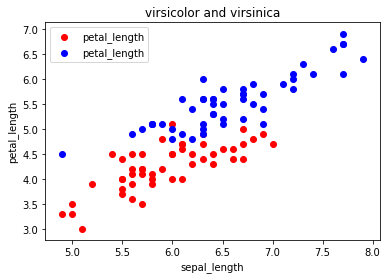

In [9]:
# scatterメソッドで散布図を表示
plt.scatter(feature_virsicolor['sepal_length'], feature_virsicolor['petal_length'], c='red')
plt.scatter(feature_virsinica['sepal_length'], feature_virsinica['petal_length'], c='blue')

# xlabelの設定
plt.xlabel('sepal_length')

# ylabelの設定
plt.ylabel('petal_length')

# titileの設定
plt.title('virsicolor and virsinica')

# 凡例の表示
plt.legend();

### 箱ひげ図の表示

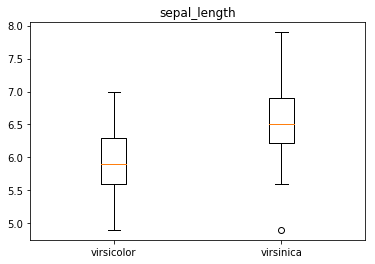

In [10]:
# boxplotメソッドにて箱ひげ図の表示
plt.boxplot([feature_virsicolor['sepal_length'], feature_virsinica['sepal_length']],
            labels=['virsicolor', 'virsinica'])

# titleの設定
plt.title('sepal_length');

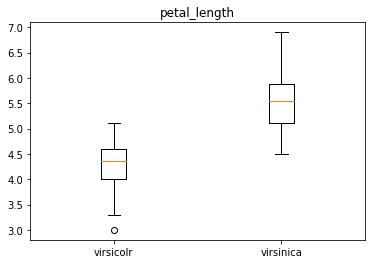

In [11]:
# boxplotメソッドにて箱ひげ図の表示
plt.boxplot([feature_virsicolor['petal_length'], feature_virsinica['petal_length']],
            labels=['virsicolr', 'virsinica'])

# titleの設定
plt.title('petal_length');

### バイオリン図の表示　

In [12]:
# seaborn ライブラリをインポート
import seaborn as sns

In [13]:
# meltメソッドでfeature_virsicolorのデータをを縦に結合(Species列は除く為、対象は1列目までと指定)
virsicolor_melt = pd.melt(feature_virsicolor.iloc[:,:2])
virsicolor_melt.head()

,variable,value
0,sepal_length,7.0
1,sepal_length,6.4
2,sepal_length,6.9
3,sepal_length,5.5
4,sepal_length,6.5


In [14]:
# virsicolor_melt の右端にSpecies列を追加
virsicolor_melt['Species'] = 'virsicolor'
virsicolor_melt.head()

,variable,value,Species
0,sepal_length,7.0,virsicolor
1,sepal_length,6.4,virsicolor
2,sepal_length,6.9,virsicolor
3,sepal_length,5.5,virsicolor
4,sepal_length,6.5,virsicolor


In [15]:
# meltメソッドでfeature_virsinicaのデータをを縦に結合
virsinica_melt = pd.melt(feature_virsinica.iloc[:,:2])
virsinica_melt.head()

,variable,value
0,sepal_length,6.3
1,sepal_length,5.8
2,sepal_length,7.1
3,sepal_length,6.3
4,sepal_length,6.5


In [16]:
# virsinica_melt の右端にSpecies列を追加
virsinica_melt['Species'] = 'virsinica'
virsinica_melt.head()

,variable,value,Species
0,sepal_length,6.3,virsinica
1,sepal_length,5.8,virsinica
2,sepal_length,7.1,virsinica
3,sepal_length,6.3,virsinica
4,sepal_length,6.5,virsinica


In [17]:
# virsicolor_melt と　virsinica_melt を縦に結合する
df_melt = pd.concat([virsicolor_melt, virsinica_melt], axis=0)
df_melt.head()

,variable,value,Species
0,sepal_length,7.0,virsicolor
1,sepal_length,6.4,virsicolor
2,sepal_length,6.9,virsicolor
3,sepal_length,5.5,virsicolor
4,sepal_length,6.5,virsicolor


Text(0.5, 0, 'feature')

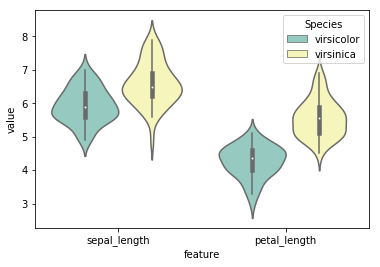

In [18]:
# violinplotメソッドにてバイオリン図を作成
sns.violinplot(x='variable', y='value', data=df_melt, hue='Species', dodge=True,
              jitter=True, color='black', palette='Set3')

plt.xlabel('feature')

# 【問題2-2】前処理・学習用データと検証用データの分割
前処理の一貫として、学習用（train）データと検証用（validation）データの分割を行います。今回は学習用データ75%、検証用データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

[sklearn.model_selection.train_test_split — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

## 注意点

データの分析まではPandasのDataFrame型を使用してきました。しかし、scikit-learnはNumPyのndarray型を想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

## 分割する理由

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを学習用データ、検証に使うデータが検証用データで、一般的に7対3から8対2程度の割合にします。

In [19]:
x_virgicolor_virginica.iloc[:,:2].head()

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6


In [20]:
# scikit-learnライブラリのtrain_test_splitメソッドをインポート
from sklearn.model_selection import train_test_split

# 特徴量　x をnumpy配列に変換
np_x = np.array(x_virgicolor_virginica.iloc[:,:2])

# 目的変数　y をnumpy配列に変換
np_y = np.array(x_virgicolor_virginica.iloc[:,2])

# train_test_splitメソッドにてデータを学習データとテストデータに分割　学習データは75%で設定
X_train, X_test, y_train, y_test = train_test_split(np_x, np_y, test_size = 0.25, random_state = 0)

In [21]:
X_train.shape

(75, 2)

In [22]:
X_test.shape

(25, 2)

In [23]:
y_train.shape

(75,)

In [24]:
y_test.shape

(25,)

# 【問題3】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として **標準化** を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

[sklearn.preprocessing.StandardScaler — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

## 注意点

標準化は学習用のデータでfitを行い、学習用、検証用双方のデータに**transform**を行います。検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

## 実際の問題での前処理は？

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [25]:
# 正規化前のX_train
X_train[:5]

array([[5.1, 3. ],
       [6.3, 4.7],
       [5.9, 5.1],
       [6.4, 5.6],
       [6.2, 4.8]])

In [26]:
# StandardScaler メソッドをインポート
from sklearn.preprocessing import StandardScaler

# StandardScaler クラスのインスタンス scaler　を作成
scaler = StandardScaler()

# scalre に学習データを読み込ませる
scaler.fit(X_train)

# 学習データを正規化しnumpy配列　X_train_scale　に格納
X_train_scaler = scaler.transform(X_train)
X_train_scaler[:5]

array([[-1.77029021, -2.29778941],
       [ 0.03817879, -0.24187257],
       [-0.56464421,  0.24187257],
       [ 0.18888454,  0.84655399],
       [-0.11252696, -0.12093628]])

In [27]:
# 学習データをもとに作成した変換器scalerにて、検証用データを正規化する
X_test_scaler = scaler.transform(X_test)
X_test_scaler[:5]

array([[ 7.91707539e-01, -1.20936285e-01],
       [ 3.81787899e-02,  8.46553995e-01],
       [ 9.42413289e-01,  2.14825997e-15],
       [ 1.99735354e+00,  2.05591684e+00],
       [ 1.39453054e+00,  1.33029913e+00]])

# 【問題4】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは学習用データです。

[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

学習が終わった後、検証用データを**predict**メソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、**n_neighbors**の数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を**5-nn**、3の場合を**3-nn**のように呼びます。

In [28]:
# KNeighborsClassifier メソッドをインポート
from sklearn.neighbors import KNeighborsClassifier

# 予測データを格納する辞書　predict
predict = {}

# 1~10まで i が変化
for i in range(1, 11):
    
    # KNeighborsClassifierのモデルを作成
    clf = KNeighborsClassifier(n_neighbors = i)
    
    # 正規化を行った学習用データで学習
    clf.fit(X_train_scaler, y_train)
    
    # 予測データを辞書predictに格納
    predict[i] = clf.predict(X_test_scaler)
    
    # 予測結果を表示
    print('n_neighbors = {}：{}'.format( i , predict[i]))

n_neighbors = 1：[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 2：[1 2 1 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 3：[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 4：[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 5：[1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 6：[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 7：[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 8：[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 9：[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
n_neighbors = 10：[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


In [29]:
predict

{1: array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 2: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 3: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 4: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 5: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 6: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 7: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 8: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 9: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1]),
 10: array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1])}

# 【問題5】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には accuracy、precision、recall、f値 があります。scikit-learnに用意されていますので、それぞれを計算してください。また、それぞれの意味について簡単に調査してマークダウンでまとめてください。

[sklearn.metrics.accuracy_score — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[sklearn.metrics.precision_score — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

[sklearn.metrics.recall_score — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

[sklearn.metrics.f1_score — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

precision、recall、f値を計算する背景にはTrue Positive、True Negative、False Positive、False Negativeがあります。この4種類を計算し表示するものとして混合行列があります。これもscikit-learnを使い表示させてください。

[sklearn.metrics.confusion_matrix — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)



## accuracy の表示

In [30]:
# accuracy_scoreメソッドをインポート
from sklearn.metrics import accuracy_score

# 検証用データで予測
for i in range(1, 11):
    
    # 正解率を計算
    knn_acc = accuracy_score(y_test, predict[i])
    
    print('KNeighborsClassifier(n_neighbors={})の Accuracy： {:.0f}%'.format(i, knn_acc * 100))

KNeighborsClassifier(n_neighbors=1)の Accuracy： 84%
KNeighborsClassifier(n_neighbors=2)の Accuracy： 88%
KNeighborsClassifier(n_neighbors=3)の Accuracy： 92%
KNeighborsClassifier(n_neighbors=4)の Accuracy： 92%
KNeighborsClassifier(n_neighbors=5)の Accuracy： 88%
KNeighborsClassifier(n_neighbors=6)の Accuracy： 92%
KNeighborsClassifier(n_neighbors=7)の Accuracy： 92%
KNeighborsClassifier(n_neighbors=8)の Accuracy： 92%
KNeighborsClassifier(n_neighbors=9)の Accuracy： 92%
KNeighborsClassifier(n_neighbors=10)の Accuracy： 92%


## precision score の表示

In [31]:
# precision_score　メソッドのインポート
from sklearn.metrics import precision_score

for i in range(1, 11):
    
    # precision scoreを計算
    knn_pre = precision_score(y_test, predict[i], average='micro')
    
    # 表示
    print('KNeighborsClassifier(n_neighbors={})の Precision_score： {:.0f}%'.format(i, knn_pre * 100))

KNeighborsClassifier(n_neighbors=1)の Precision_score： 84%
KNeighborsClassifier(n_neighbors=2)の Precision_score： 88%
KNeighborsClassifier(n_neighbors=3)の Precision_score： 92%
KNeighborsClassifier(n_neighbors=4)の Precision_score： 92%
KNeighborsClassifier(n_neighbors=5)の Precision_score： 88%
KNeighborsClassifier(n_neighbors=6)の Precision_score： 92%
KNeighborsClassifier(n_neighbors=7)の Precision_score： 92%
KNeighborsClassifier(n_neighbors=8)の Precision_score： 92%
KNeighborsClassifier(n_neighbors=9)の Precision_score： 92%
KNeighborsClassifier(n_neighbors=10)の Precision_score： 92%


##  recall scoreの表示

In [32]:
# recall_score　メソッドのインポート
from sklearn.metrics import recall_score

for i in range(1, 11):
    
    # recall_scoreを計算
    knn_rec = recall_score(y_test, predict[i], average='micro')
    
    # 表示
    print('KNeighborsClassifier(n_neighbors={})の Recall_score： {:.0f}%'.format(i, knn_rec * 100))

KNeighborsClassifier(n_neighbors=1)の Recall_score： 84%
KNeighborsClassifier(n_neighbors=2)の Recall_score： 88%
KNeighborsClassifier(n_neighbors=3)の Recall_score： 92%
KNeighborsClassifier(n_neighbors=4)の Recall_score： 92%
KNeighborsClassifier(n_neighbors=5)の Recall_score： 88%
KNeighborsClassifier(n_neighbors=6)の Recall_score： 92%
KNeighborsClassifier(n_neighbors=7)の Recall_score： 92%
KNeighborsClassifier(n_neighbors=8)の Recall_score： 92%
KNeighborsClassifier(n_neighbors=9)の Recall_score： 92%
KNeighborsClassifier(n_neighbors=10)の Recall_score： 92%


## f値の表示

In [33]:
# 　メソッドのインポート
from sklearn.metrics import f1_score

for i in range(1, 11):
    
    # recall_scoreを計算
    knn_f1 = f1_score(y_test, predict[i], average='micro')
    
    # 表示
    print('KNeighborsClassifier(n_neighbors={})の F値： {:.0f}%'.format(i, knn_f1 * 100))

KNeighborsClassifier(n_neighbors=1)の F値： 84%
KNeighborsClassifier(n_neighbors=2)の F値： 88%
KNeighborsClassifier(n_neighbors=3)の F値： 92%
KNeighborsClassifier(n_neighbors=4)の F値： 92%
KNeighborsClassifier(n_neighbors=5)の F値： 88%
KNeighborsClassifier(n_neighbors=6)の F値： 92%
KNeighborsClassifier(n_neighbors=7)の F値： 92%
KNeighborsClassifier(n_neighbors=8)の F値： 92%
KNeighborsClassifier(n_neighbors=9)の F値： 92%
KNeighborsClassifier(n_neighbors=10)の F値： 92%


## 混同行列の表示

In [34]:
# 　confusion_matrixメソッドのインポート
from sklearn.metrics import confusion_matrix

for i in range(1, 11):
    print('KNeighborsClassifier(n_neighbors={})の 混同行列：'.format(i))
    print(confusion_matrix(y_test, predict[i], labels=[1, 2]))
    print('')

KNeighborsClassifier(n_neighbors=1)の 混同行列：
[[10  3]
 [ 1 11]]

KNeighborsClassifier(n_neighbors=2)の 混同行列：
[[11  2]
 [ 1 11]]

KNeighborsClassifier(n_neighbors=3)の 混同行列：
[[11  2]
 [ 0 12]]

KNeighborsClassifier(n_neighbors=4)の 混同行列：
[[11  2]
 [ 0 12]]

KNeighborsClassifier(n_neighbors=5)の 混同行列：
[[10  3]
 [ 0 12]]

KNeighborsClassifier(n_neighbors=6)の 混同行列：
[[11  2]
 [ 0 12]]

KNeighborsClassifier(n_neighbors=7)の 混同行列：
[[11  2]
 [ 0 12]]

KNeighborsClassifier(n_neighbors=8)の 混同行列：
[[11  2]
 [ 0 12]]

KNeighborsClassifier(n_neighbors=9)の 混同行列：
[[11  2]
 [ 0 12]]

KNeighborsClassifier(n_neighbors=10)の 混同行列：
[[11  2]
 [ 0 12]]



# 【問題6】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。どう分割するかという **決定領域** を描く関数を用意しました。これを利用して可視化を行ってください。可能であればより見やすく改良も行いましょう。

In [35]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, 
                                    title='decision region', xlabel='xlabel', ylabel='ylabel', 
                                    target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

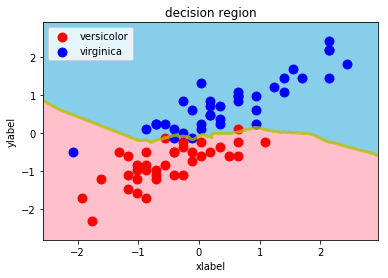

In [36]:
# 散布図の表示(clf はn_neighbors=10のモデル)
decision_region(X_train_scaler, y_train, clf)

## 何をプロットするか
この例では学習データをプロットしたことでどのように学習したかを見ることができます。一方で、検証用データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。また、両方合わせてプロットすることも可能です。いろいろと見てみるのが良いでしょう。

## 手法の改善
実際の問題では指標値や可視化を元に手法を改善していきますが、ここでは扱いません。

# 4.各手法の比較
他の手法も基本的な流れは同様です。他の手法でも学習から可視化までを行っていきます。

# 【問題7】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった決定領域になっていたかを述べてください。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。

[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

[sklearn.linear_model.LogisticRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[sklearn.svm.SVC — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

[sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [37]:
# 評価指標が格納されたリスト
evaluation_list = ['Accuracy', 'Precision_Score', 'Recall_Score', 'F値']

# 各モデルの評価結果が格納されるリスト
evaluation_result = {}

### ①最近傍法

### モデル作成、予測

In [38]:
# LogisticRegressionのモデルを作成
clf = KNeighborsClassifier()

# 正規化した学習データで学習
clf.fit(X_train_scaler, y_train)

# 予測結果をLog_preに格納
predict = clf.predict(X_test_scaler)
predict

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

### 評価

In [39]:
# 評価結果を格納する辞書
result = {}

# 正解率を計算
acc = accuracy_score(y_test, predict)
#　辞書に格納
result['Accuracy'] = acc
    
# precision scoreを計算
pre = precision_score(y_test, predict, average='micro')
#　辞書に格納
result['Precision_Score'] = pre
    
# recall_scoreを計算
rec = recall_score(y_test, predict, average='micro')
#　辞書に格納
result['Recall_Score'] = rec
    
# recall_scoreを計算
f1 = f1_score(y_test, predict, average='micro')
#　辞書に格納
result['F値'] = f1

print('最近傍モデルの評価')
for evaluation in evaluation_list:
    print('{} : {:.0f}%'.format(evaluation, result[evaluation] * 100))

# 評価結果を格納
evaluation_result['knn'] = result

最近傍モデルの評価
Accuracy : 88%
Precision_Score : 88%
Recall_Score : 88%
F値 : 88%


In [40]:
evaluation_result

{'knn': {'Accuracy': 0.88,
  'Precision_Score': 0.88,
  'Recall_Score': 0.88,
  'F値': 0.88}}

### 可視化

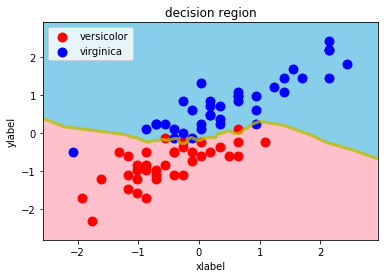

In [41]:
# 散布図の表示
decision_region(X_train_scaler, y_train, clf)

## ②ロジスティック回帰モデル

### モデル作成、予測

In [42]:
# LogisticRegression メソッドをインポート
from sklearn.linear_model import LogisticRegression

# LogisticRegressionのモデルを作成
clf = LogisticRegression()

# 正規化した学習データで学習
clf.fit(X_train_scaler, y_train)

# 予測結果をLog_preに格納
predict = clf.predict(X_test_scaler)
predict

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

### 評価

In [43]:
# 評価結果を格納する辞書
result = {}

# 正解率を計算
acc = accuracy_score(y_test, predict)
#　辞書に格納
result['Accuracy'] = acc
    
# precision scoreを計算
pre = precision_score(y_test, predict, average='micro')
#　辞書に格納
result['Precision_Score'] = pre
    
# recall_scoreを計算
rec = recall_score(y_test, predict, average='micro')
#　辞書に格納
result['Recall_Score'] = rec
    
# recall_scoreを計算
f1 = f1_score(y_test, predict, average='micro')
#　辞書に格納
result['F値'] = f1

print('ロジスティック回帰モデルの評価')
for evaluation in evaluation_list:
    print('{} : {:.0f}%'.format(evaluation, result[evaluation] * 100))

# 評価結果を格納
evaluation_result['log'] = result

ロジスティック回帰モデルの評価
Accuracy : 92%
Precision_Score : 92%
Recall_Score : 92%
F値 : 92%


### 可視化

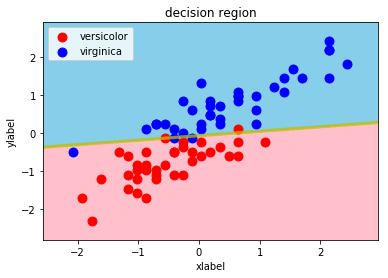

In [44]:
# 散布図の表示
decision_region(X_train_scaler, y_train, clf)

## ③SVM

### モデル作成、予測

In [45]:
# LogisticRegression メソッドをインポート
from sklearn.svm import SVC

# LogisticRegressionのモデルを作成
clf = SVC()

# 正規化した学習データで学習
clf.fit(X_train_scaler, y_train)

# 予測結果をLog_preに格納
predict = clf.predict(X_test_scaler)
predict

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

### 評価

In [46]:
# 評価結果を格納する辞書
result = {}

# 正解率を計算
acc = accuracy_score(y_test, predict)
#　辞書に格納
result['Accuracy'] = acc
    
# precision scoreを計算
pre = precision_score(y_test, predict, average='micro')
#　辞書に格納
result['Precision_Score'] = pre
    
# recall_scoreを計算
rec = recall_score(y_test, predict, average='micro')
#　辞書に格納
result['Recall_Score'] = rec
    
# recall_scoreを計算
f1 = f1_score(y_test, predict, average='micro')
#　辞書に格納
result['F値'] = f1

print('SVMモデルの評価')
for evaluation in evaluation_list:
    print('{} : {:.0f}%'.format(evaluation, result[evaluation] * 100))

# 評価結果を格納
evaluation_result['svm'] = result

SVMモデルの評価
Accuracy : 92%
Precision_Score : 92%
Recall_Score : 92%
F値 : 92%


### 可視化

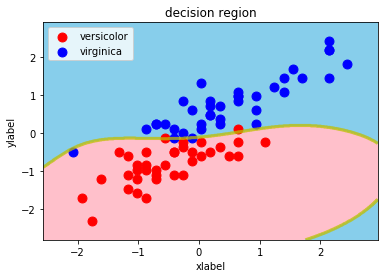

In [47]:
# 散布図の表示
decision_region(X_train_scaler, y_train, clf)

## ④決定木

### モデル作成、予測

In [48]:
#　DecisionTreeClassifier メソッドをインポート
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifierのモデルを作成
clf = DecisionTreeClassifier()

# 正規化した学習データで学習
clf.fit(X_train_scaler, y_train)

# 予測結果をLog_preに格納
predict = clf.predict(X_test_scaler)
predict

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

### 評価

In [49]:
# 評価結果を格納する辞書
result = {}

# 正解率を計算
acc = accuracy_score(y_test, predict)
#　辞書に格納
result['Accuracy'] = acc
    
# precision scoreを計算
pre = precision_score(y_test, predict, average='micro')
#　辞書に格納
result['Precision_Score'] = pre
    
# recall_scoreを計算
rec = recall_score(y_test, predict, average='micro')
#　辞書に格納
result['Recall_Score'] = rec
    
# recall_scoreを計算
f1 = f1_score(y_test, predict, average='micro')
#　辞書に格納
result['F値'] = f1

print('決定木モデルの評価')
for evaluation in evaluation_list:
    print('{} : {:.0f}%'.format(evaluation, result[evaluation] * 100))

# 評価結果を格納
evaluation_result['dec'] = result

決定木モデルの評価
Accuracy : 88%
Precision_Score : 88%
Recall_Score : 88%
F値 : 88%


### 可視化

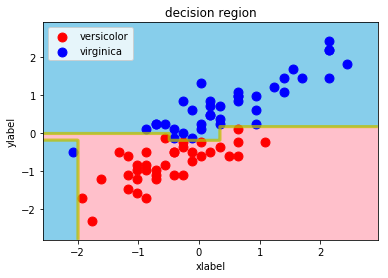

In [50]:
# 散布図の表示
decision_region(X_train_scaler, y_train, clf)

### ④ランダムフォレスト

### モデル作成、予測

In [51]:
#　RandomForestClassifier メソッドをインポート
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifierのモデルを作成
clf = RandomForestClassifier()

# 正規化した学習データで学習
clf.fit(X_train_scaler, y_train)

# 予測結果をLog_preに格納
predict = clf.predict(X_test_scaler)
predict

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

### 評価

In [52]:
# 評価結果を格納する辞書
result = {}

# 正解率を計算
acc = accuracy_score(y_test, predict)
#　辞書に格納
result['Accuracy'] = acc
    
# precision scoreを計算
pre = precision_score(y_test, predict, average='micro')
#　辞書に格納
result['Precision_Score'] = pre
    
# recall_scoreを計算
rec = recall_score(y_test, predict, average='micro')
#　辞書に格納
result['Recall_Score'] = rec
    
# recall_scoreを計算
f1 = f1_score(y_test, predict, average='micro')
#　辞書に格納
result['F値'] = f1

print('ランダムフォレストモデルの評価')
for evaluation in evaluation_list:
    print('{} : {:.0f}%'.format(evaluation, result[evaluation] * 100))

# 評価結果を格納
evaluation_result['ran'] = result

ランダムフォレストモデルの評価
Accuracy : 88%
Precision_Score : 88%
Recall_Score : 88%
F値 : 88%


### 可視化

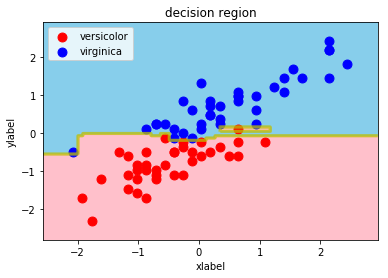

In [53]:
# 散布図の表示
decision_region(X_train_scaler, y_train, clf)

### それぞれのモデルの評価結果を表でまとめて表示

In [54]:
# 指標値の表となるデータフレームを作成
evaluation_df = pd.DataFrame(columns=evaluation_list)

In [55]:
# 各モデルの評価結果が格納された辞書evaluation_resultから、
#キー(モデル名)とバリュー(評価結果)を取り出す
# バリューは辞書型
for model_name, evaluation in evaluation_result.items():
    
    # データフレーム evaluation_df に追加する
    evaluation_df.loc[model_name] = list(evaluation.values())
    
evaluation_df

,Accuracy,Precision_Score,Recall_Score,F値
knn,0.88,0.88,0.88,0.88
log,0.92,0.92,0.92,0.92
svm,0.92,0.92,0.92,0.92
dec,0.88,0.88,0.88,0.88
ran,0.88,0.88,0.88,0.88


### 考察
1. どのモデルが正確に分類できていたか？
    - 評価結果より**ロジスティック回帰モデル**と**SVMモデル**が全ての評価指標において最もよい精度で分類できていることを確認
    
    
2. 決定境界について確認できたことは？
    - **最近傍法、ロジスティック回帰、SVM**
        - 外れ値を正しく分類できていない
            - $X=-2　Y=-0.5$のあたりにあるvirsinicaクラスのデータをvirsicolorクラスと誤って分類されている
    - **決定木、ランダムフォレスト** 
        - 外れ値を正しく分類できている